In [18]:
from utils.MR import *
from datetime import datetime
import glob
import sdds
import matplotlib.pyplot as plt

In [42]:
def get_average_profile(my_profiles_amp): #  from utils/MR.py
    average_profile = np.mean(my_profiles_amp, axis=0) 
    baseline = np.mean(average_profile[0:20]) 
    average_profile -= baseline
    return baseline, average_profile

In [20]:
path2files='SMR.SCOPE13.CH01@Acquisition/' # path to MR data, they should be unziped (.sdds)
files_list = sorted(glob.glob(path2files+'*')) # create a list with all the MR data

In [21]:
sdds_data = sdds.read(files_list[0]) # here the analysis is performed for the acquistion 0

In [26]:
profiles_amp =  sdds_data.values['value']
triggerStamps = sdds_data.values['triggerStamp']
start_str = str(datetime.fromtimestamp(triggerStamps [0]/1e9))
end_str = str(datetime.fromtimestamp(triggerStamps [-1]/1e9))

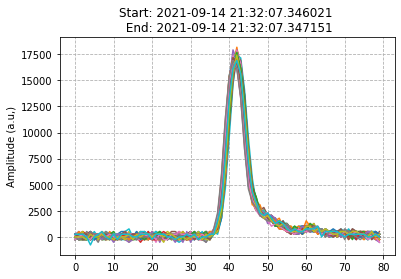

In [28]:
# plot all profiles for the acquisition period defined by start, end
# Comment: The profiles are assymetric. This is the limitation of the mountain range instrument.
fig, ax = plt.subplots()
for i in range(len(profiles_amp)):
    ax.plot(profiles_amp[i])
ax.set_title(f'Start: {start_str} \n End: {end_str}')
ax.set_ylabel('Amplitude (a.u,)')
ax.grid(ls='--')

In [29]:
# compute bunch profile, averaged over the acquisition period

In [43]:
baseline, average_profile = get_average_profile(profiles_amp)

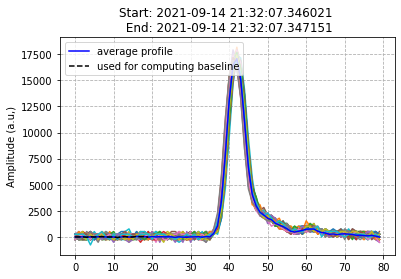

In [50]:
fig, ax = plt.subplots()
for i in range(len(profiles_amp)):
    ax.plot(profiles_amp[i])
ax.plot(average_profile, c='b', label='average profile')
ax.plot(average_profile[0:20], c='k', ls='--', label='used for computing baseline')
ax.set_title(f'Start: {start_str} \n End: {end_str}')
ax.set_ylabel('Amplitude (a.u,)')
ax.legend(loc=2)
ax.grid(ls='--')
